In [47]:
import os
os.chdir('/kaggle/input/functions')
from functions import *

In [48]:
!ls

functions.py


In [49]:
import pandas as pd
import numpy as np
import pickle
from functions import *
os.chdir('/kaggle/input/mydatasets2')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xg
from tqdm import tqdm
from copy import deepcopy

In [50]:
def models_predict(model_list, x_values):
  preds = np.zeros((x_values.get_data().shape[0], ))
  for mdl in  models_list:
    preds += mdl.predict(x_values)
  return preds/len(model_list)

In [51]:
models_dict = {}
train_metrics_dict = {}
valid_metrics_dict = {}
test_metrics_dict = {}

In [52]:
help(preprocess_data_equal_division)

Help on function preprocess_data_equal_division in module functions:

preprocess_data_equal_division(file_path, split=True, time_steps=10, num_stocks=30, le=False, only_close=False, equal_split=True, min_change=1e-05)



In [53]:
num_stocks = 100
# args---------
le = True
only_close=False
equal_split=False
#--------------
for k in tqdm(range(10, 101, 10)):    
    time_steps = k
    args = [time_steps, num_stocks, le, only_close, equal_split]
    print("Time_steps =", time_steps)
    x_train, x_valid, y_train, y_valid = preprocess_data_equal_division('training_set1.pkl', time_steps=time_steps, split = True, num_stocks = 100, le = True,
                                        only_close=False,
                                        equal_split=False)
    print(x_train.shape, x_valid.shape)
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_valid = x_valid.reshape((x_valid.shape[0], -1))
    xg_train = xg.DMatrix(x_train, y_train)
    xg_valid = xg.DMatrix(x_valid)
    params = {'objective':'multi:softmax', 'eval_metric':'merror', 'num_class':'3',
              'device':'cuda',
              'eta':'0.1', 'max_depth':'5'}
    models_list = []
    for i in range(1):
      mdl1 = xg.train(params, xg_train, num_boost_round=int(time_steps*1.5))
      models_list.append(mdl1)
    models_dict[time_steps] = deepcopy(models_list[0])
    train_preds = models_predict(models_list, xg_train)
    train_metrics_dict[time_steps] = metric_calculations(train_preds, y_train, set_ = "Train Set")
    valid_preds = models_predict(models_list, xg_valid)
    valid_metrics_dict[time_steps] = metric_calculations(valid_preds, y_valid, set_ = "Validation Set")
    pickle_file_path = 'training_set11.pkl'
    x_test, y_test = preprocess_data_equal_division(pickle_file_path, time_steps=time_steps, split = False, num_stocks = 100, le = True,
                                        only_close=False,
                                        equal_split=False)
    x_test = x_test.reshape((x_test.shape[0], -1))
    xg_test = xg.DMatrix(x_test)
    test_preds = models_predict(models_list, xg_test)
    test_metrics_dict[time_steps] = metric_calculations(test_preds, y_test, set_ = "Test Set")

  0%|          | 0/10 [00:00<?, ?it/s]

Time_steps = 10
(175360, 10, 4) (43840, 10, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:15:11] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 51.69479927007299,
  Precision: 51.61123827476325,
  Recall: 52.52112354418818,
  Specificity: 50.870357712462976,
  F1score: 52.062205722564286
For Validation Set
  Accuracy: 50.24178832116788,
  Precision: 50.72391638765723,
  Recall: 50.650582813770676,
  Specificity: 49.824933198194046,
  F1score: 50.68722307622751


 10%|█         | 1/10 [03:24<30:42, 204.67s/it]

For Test Set
  Accuracy: 49.51763367463026,
  Precision: 49.482058949167026,
  Recall: 42.13613422452598,
  Specificity: 56.911235596848385,
  F1score: 45.51459934677438
Time_steps = 20
(174560, 20, 4) (43640, 20, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:18:35] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 53.29915215398717,
  Precision: 53.37592483318959,
  Recall: 53.7743937990877,
  Specificity: 52.82182594816797,
  F1score: 53.574418405991054
For Validation Set
  Accuracy: 50.20164986251145,
  Precision: 50.022801897117844,
  Recall: 50.4507405022537,
  Specificity: 49.95433372910768,
  F1score: 50.2358598580261


 20%|██        | 2/10 [06:51<27:28, 206.03s/it]

For Test Set
  Accuracy: 49.084004602991946,
  Precision: 49.065234156849186,
  Recall: 42.37190822864754,
  Specificity: 55.82489563392301,
  F1score: 45.473590811623495
Time_steps = 30
(173760, 30, 4) (43440, 30, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:22:01] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 54.47974217311234,
  Precision: 54.1666224180959,
  Recall: 58.66602256650909,
  Specificity: 50.28738611101512,
  F1score: 56.32661174547784
For Validation Set
  Accuracy: 50.26933701657459,
  Precision: 50.32833020637899,
  Recall: 54.24920715172129,
  Specificity: 46.275884333348706,
  F1score: 52.21526687164061


 30%|███       | 3/10 [10:21<24:15, 207.99s/it]

For Test Set
  Accuracy: 49.23050058207218,
  Precision: 49.14616141732284,
  Recall: 46.5386676608337,
  Specificity: 51.91820021869111,
  F1score: 47.80688631712484
Time_steps = 40
(172960, 40, 4) (43240, 40, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:25:31] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 55.57007400555042,
  Precision: 54.89400271917015,
  Recall: 62.966556922543745,
  Specificity: 48.15903698130679,
  F1score: 58.65382546002367
For Validation Set
  Accuracy: 50.256706753006476,
  Precision: 50.07477466553494,
  Recall: 57.50023206163557,
  Specificity: 43.06259795335116,
  F1score: 53.531229070797416


 40%|████      | 4/10 [13:59<21:11, 211.91s/it]

For Test Set
  Accuracy: 49.22143698468787,
  Precision: 48.91927551877174,
  Recall: 48.310826818289506,
  Specificity: 50.12180838603888,
  F1score: 48.613147386614216
Time_steps = 50
(172160, 50, 4) (43040, 50, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:29:09] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 56.73501394052045,
  Precision: 55.87656466968362,
  Recall: 64.84985507246377,
  Specificity: 48.58805726923524,
  F1score: 60.029728845029005
For Validation Set
  Accuracy: 50.36245353159852,
  Precision: 50.15461226456769,
  Recall: 58.24821603469987,
  Specificity: 42.53437659150887,
  F1score: 53.89927064002418


 50%|█████     | 5/10 [17:44<18:01, 216.33s/it]

For Test Set
  Accuracy: 49.162097735399286,
  Precision: 48.841921726632265,
  Recall: 49.74562035037197,
  Specificity: 48.5863130475965,
  F1score: 49.289629180487694
Time_steps = 60
(171360, 60, 4) (42840, 60, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:32:53] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 57.60329131652661,
  Precision: 57.01254275940707,
  Recall: 62.34559269099893,
  Specificity: 52.846355262542666,
  F1score: 59.55992452031995
For Validation Set
  Accuracy: 50.17740429505135,
  Precision: 50.26184697917997,
  Recall: 54.991382121395624,
  Specificity: 45.34225424601132,
  F1score: 52.52035413978733


 60%|██████    | 6/10 [21:37<14:48, 222.06s/it]

For Test Set
  Accuracy: 49.25211097708082,
  Precision: 48.778365837743785,
  Recall: 49.15852797194281,
  Specificity: 49.34394493439449,
  F1score: 48.967709066207334
Time_steps = 70
(170560, 70, 4) (42640, 70, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:36:46] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 58.765830206378986,
  Precision: 57.48022868981454,
  Recall: 67.61532062472907,
  Specificity: 49.9020079567192,
  F1score: 62.137208137951085
For Validation Set
  Accuracy: 50.10787992495309,
  Precision: 49.95594360781801,
  Recall: 58.690946734425,
  Specificity: 41.57939031232466,
  F1score: 53.972306360882726


 70%|███████   | 7/10 [25:41<11:27, 229.23s/it]

For Test Set
  Accuracy: 49.205128205128204,
  Precision: 48.814364691369306,
  Recall: 52.67854941695634,
  Specificity: 45.79674383724024,
  F1score: 50.672895644853384
Time_steps = 80
(169760, 80, 4) (42440, 80, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:40:49] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 59.886899151743634,
  Precision: 58.91716057310693,
  Recall: 65.81370462269365,
  Specificity: 53.93812778112201,
  F1score: 62.17477281311796
For Validation Set
  Accuracy: 50.36050895381715,
  Precision: 50.300450676014016,
  Recall: 56.82900381877328,
  Specificity: 43.89749870460219,
  F1score: 53.36579966795794


 80%|████████  | 8/10 [29:56<07:55, 237.63s/it]

For Test Set
  Accuracy: 49.42027194066749,
  Precision: 49.11402250796043,
  Recall: 50.27618810649416,
  Specificity: 48.575288626873004,
  F1score: 49.688310730225865
Time_steps = 90
(168960, 90, 4) (42240, 90, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:45:04] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 60.7516571969697,
  Precision: 59.27776882153797,
  Recall: 69.43467484952201,
  Specificity: 52.01709604653924,
  F1score: 63.95547293698159
For Validation Set
  Accuracy: 50.44744318181819,
  Precision: 49.96960732666045,
  Recall: 58.95486708739721,
  Specificity: 42.1027949728006,
  F1score: 54.091636874081544


 90%|█████████ | 9/10 [34:27<04:07, 247.87s/it]

For Test Set
  Accuracy: 49.276595744680854,
  Precision: 48.80009686402712,
  Recall: 50.96997748944027,
  Specificity: 47.617867849267896,
  F1score: 49.861441013460016
Time_steps = 100
(168160, 100, 4) (42040, 100, 4)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [18:49:35] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


For Train Set
  Accuracy: 62.2413177925785,
  Precision: 61.18138925013166,
  Recall: 67.52508837275509,
  Specificity: 56.929571418350065,
  F1score: 64.19690433900026
For Validation Set
  Accuracy: 50.4709800190295,
  Precision: 50.568787013761664,
  Recall: 56.280525392384654,
  Specificity: 44.623168345186386,
  F1score: 53.271992818671464


100%|██████████| 10/10 [39:12<00:00, 235.21s/it]

For Test Set
  Accuracy: 49.268694550063366,
  Precision: 48.84822659481138,
  Recall: 49.8312365756367,
  Specificity: 48.715822275834334,
  F1score: 49.334835385998


In [54]:
lis = [models_dict,
train_metrics_dict, 
valid_metrics_dict, 
test_metrics_dict]

In [55]:
file_path = '/kaggle/working/xg_olhv.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(lis, file)

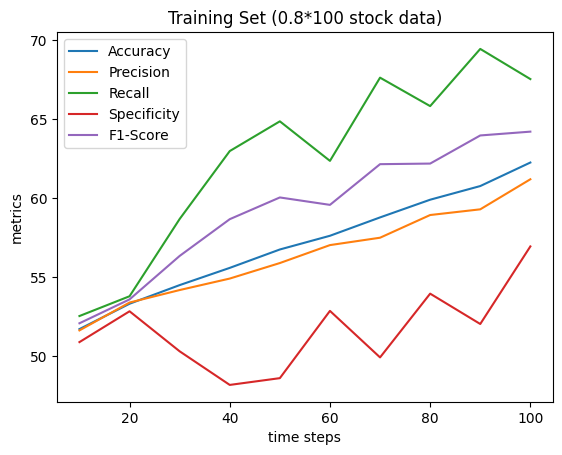

In [56]:
num_stocks=100
valid_split = 0.2
# train metrics plot
import matplotlib.pyplot as plt
x = train_metrics_dict.keys()
y = train_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Training Set ({1-valid_split}*{num_stocks} stock data)')
plt.show()

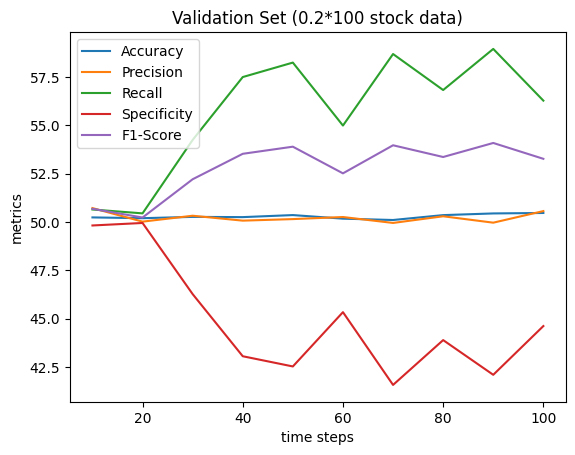

In [57]:
# valid metrics plot
import matplotlib.pyplot as plt
x = valid_metrics_dict.keys()
y = valid_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Validation Set ({valid_split}*{num_stocks} stock data)')
plt.show()

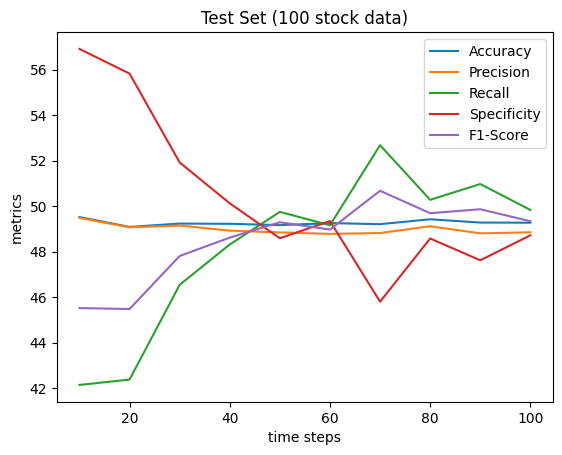

In [58]:
# test metrics plot
import matplotlib.pyplot as plt
x = test_metrics_dict.keys()
y = test_metrics_dict.values()
plt.plot(x, y, label=['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score'])
plt.legend()
plt.xlabel('time steps')
plt.ylabel('metrics')
plt.title(f'Test Set ({num_stocks} stock data)')
plt.show()